<a href="https://colab.research.google.com/github/kartik900/ML-project/blob/main/Machine_Learning_Final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
import numpy as np
import pandas as pd
import seaborn as sns

In [30]:
data = pd.read_csv('/content/drive/MyDrive/kaggle/input/USvideos.csv', sep=',')
data.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


In [31]:
#dataset size
len(data)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40949 non-null  object
 1   trending_date           40949 non-null  object
 2   title                   40949 non-null  object
 3   channel_title           40949 non-null  object
 4   category_id             40949 non-null  int64 
 5   publish_time            40949 non-null  object
 6   tags                    40949 non-null  object
 7   views                   40949 non-null  int64 
 8   likes                   40949 non-null  int64 
 9   dislikes                40949 non-null  int64 
 10  comment_count           40949 non-null  int64 
 11  thumbnail_link          40949 non-null  object
 12  comments_disabled       40949 non-null  bool  
 13  ratings_disabled        40949 non-null  bool  
 14  video_error_or_removed  40949 non-null  bool  
 15  de

In [32]:
numerics = ['int8','int16', 'int32', 'int64', 'float16', 'float32', 'float64']
display(data.select_dtypes(include=numerics).columns)
print(data.select_dtypes(include=numerics).shape)
data_num = data.select_dtypes(include=numerics)
data_num.head(3)

Index(['category_id', 'views', 'likes', 'dislikes', 'comment_count'], dtype='object')

(40949, 5)


,category_id,views,likes,dislikes,comment_count
0,22,748374,57527,2966,15954
1,24,2418783,97185,6146,12703
2,23,3191434,146033,5339,8181


In [33]:
data_missing_value = data.isnull().sum().reset_index()
data_missing_value.columns = ['feature','missing_value']
data_missing_value

,feature,missing_value
0,video_id,0
1,trending_date,0
2,title,0
3,channel_title,0
4,category_id,0
5,publish_time,0
6,tags,0
7,views,0
8,likes,0
9,dislikes,0


In [34]:
#see the percentage of missing value for each feature
data_missing_value['percentage'] = round((data_missing_value['missing_value']/len(data))*100,2)
data_missing_value = data_missing_value.sort_values('percentage', ascending=False).reset_index(drop=True)
data_missing_value = data_missing_value[data_missing_value['percentage']>0]
data_missing_value

,feature,missing_value,percentage
0,description,570,1.39


In [35]:
data['comments_disabled'].value_counts()

False    40316
True       633
Name: comments_disabled, dtype: int64

In [36]:
data['ratings_disabled'].value_counts()

False    40780
True       169
Name: ratings_disabled, dtype: int64

In [37]:


##Prepare data type columns
data['trending_date'] = pd.to_datetime(data['trending_date'], format='%y.%d.%m')
data['publish_time'] = pd.to_datetime(data['publish_time'], infer_datetime_format=True)

##Adding a new columns for publish date and time
data['publish_date'] = data['publish_time'].dt.date
data['publish_wd'] = data['publish_time'].dt.weekday
data['publish_hr'] = data['publish_time'].dt.hour
data['publish_time'] = data['publish_time'].dt.time

#remove columns not useful for training the model
data = data.drop(['tags', 'video_error_or_removed', 'description'],axis = 1)

#dropping duplicates, keeping the first value
dsta = data.drop_duplicates(keep = 'first')


In [38]:
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   video_id           40949 non-null  object        
 1   trending_date      40949 non-null  datetime64[ns]
 2   title              40949 non-null  object        
 3   channel_title      40949 non-null  object        
 4   category_id        40949 non-null  int64         
 5   publish_time       40949 non-null  object        
 6   views              40949 non-null  int64         
 7   likes              40949 non-null  int64         
 8   dislikes           40949 non-null  int64         
 9   comment_count      40949 non-null  int64         
 10  thumbnail_link     40949 non-null  object        
 11  comments_disabled  40949 non-null  bool          
 12  ratings_disabled   40949 non-null  bool          
 13  publish_date       40949 non-null  object        
 14  publis

,video_id,trending_date,title,channel_title,category_id,publish_time,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,publish_date,publish_wd,publish_hr
0,2kyS6SvSYSE,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,17:13:01,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,2017-11-13,0,17
1,1ZAPwfrtAFY,2017-11-14,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,07:30:00,2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,2017-11-13,0,7
2,5qpjK5DgCt4,2017-11-14,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,19:05:24,3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,2017-11-12,6,19
3,puqaWrEC7tY,2017-11-14,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,11:00:04,343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,2017-11-13,0,11
4,d380meD0W0M,2017-11-14,I Dare You: GOING BALD!?,nigahiga,24,18:01:41,2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,2017-11-12,6,18


Text(0.5, 0, 'views')

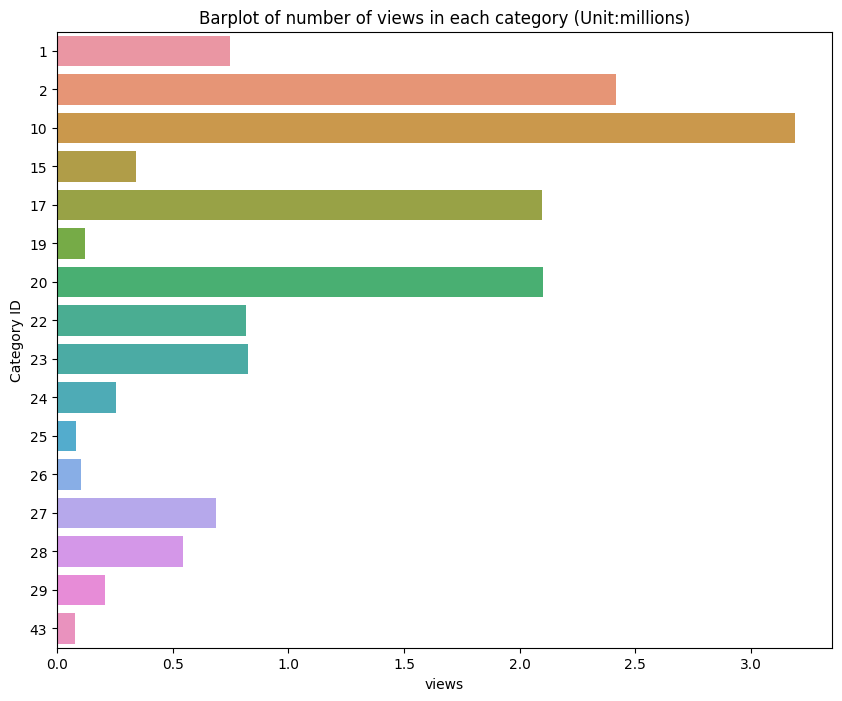

In [39]:
dff = data[['category_id', 'views']].groupby('category_id').aggregate(np.sum).reset_index()\
.sort_values(by='views', ascending=False)
dff.views = data.views/10**6
plt.figure(figsize=(10,8))
view_box = sns.barplot(x='views', y='category_id',data=dff, orient='h')
plt.title('Barplot of number of views in each category (Unit:millions)')
plt.ylabel('Category ID')
plt.xlabel('views')

#Education, Film&Animation, and comedy are what Americans watch the most

In [40]:
print(data[['views', 'likes']].corr())
print(data[['views', 'dislikes']].corr())

          views     likes
views  1.000000  0.849177
likes  0.849177  1.000000
             views  dislikes
views     1.000000  0.472213
dislikes  0.472213  1.000000


What we discovered:
1. The correlation between the view and like count is very high 0.85. Which means if the view count is high then the number of likes is highly influenced by it too.
2. The correlation between view count and dislike count is 0.47, meaning, the dislike count is also highly influenced by the number of views. Or in simpler words, to make a video popular, it does not require high content quality/positive reactions(high like count).

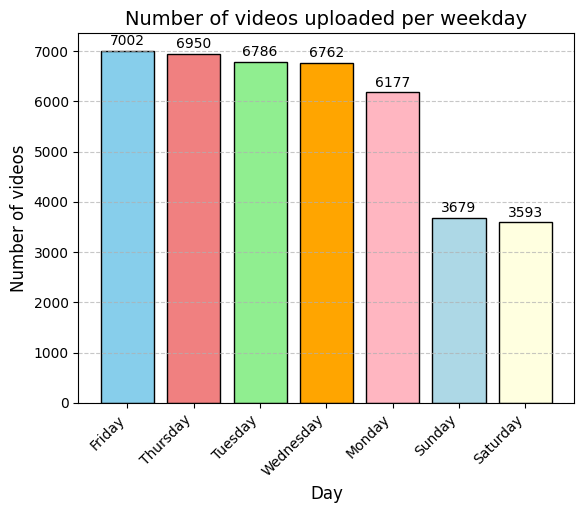

In [41]:
# Date and time analysis

data_with_days = data['publish_wd'].map(dict(zip(range(7),
    ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']))).value_counts()

import matplotlib.pyplot as plt

colors = ['skyblue', 'lightcoral', 'lightgreen', 'orange', 'lightpink', 'lightblue', 'lightyellow']
plt.bar(data_with_days.index.values, data_with_days, color=colors, edgecolor='black')

plt.xlabel('Day', fontsize=12)
plt.ylabel('Number of videos', fontsize=12)
plt.title('Number of videos uploaded per weekday', fontsize=14)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45, ha='right')

for i, value in enumerate(data_with_days):
    plt.text(i, value + 50, str(value), ha='center', va='bottom', fontsize=10)

plt.show()

In [66]:
#number of days it takes for a video to get to trending page on youtube

#considering only videos with disabled comments to reduce training time and also because comment count is currently not useful
new_data = data.loc[(data.comments_disabled) &  (~data.ratings_disabled)].copy()
#Create a new column for the number of days a video takes to get on the trending list
new_data['day_to_trend'] = abs(np.subtract(new_data.trending_date.dt.date,new_data.publish_date).apply(lambda x: x.days))
left_vars = ['views','likes','dislikes','comment_count','publish_wd','publish_hr','day_to_trend','title']

new_data = new_data[left_vars]
new_data.reset_index(inplace=True)
new_data.head()
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 527 entries, 0 to 526
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   index          527 non-null    int64 
 1   views          527 non-null    int64 
 2   likes          527 non-null    int64 
 3   dislikes       527 non-null    int64 
 4   comment_count  527 non-null    int64 
 5   publish_wd     527 non-null    int64 
 6   publish_hr     527 non-null    int64 
 7   day_to_trend   527 non-null    int64 
 8   title          527 non-null    object
dtypes: int64(8), object(1)
memory usage: 37.2+ KB


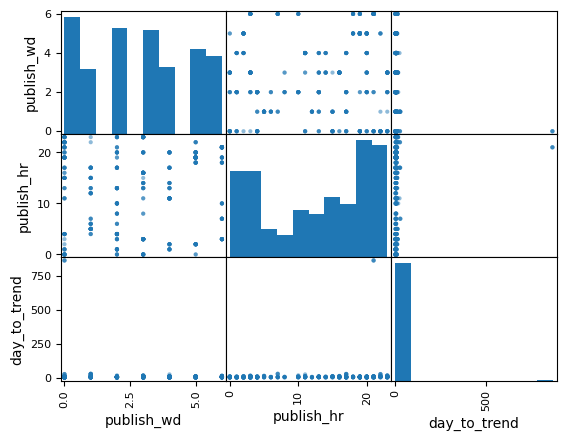

In [67]:
from pandas.plotting import scatter_matrix
scatter_matrix(new_data[['publish_wd', 'publish_hr', 'day_to_trend']])
plt.show()

no normal distribution of numerical values -> Random forest model



In [43]:
#RANDOM FOREST

import sklearn
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
#considering only videos which took less than a week to get on trending
new_data.day_to_trend = new_data.day_to_trend <= 7

X = new_data[['views', 'likes', 'dislikes', 'publish_wd', 'publish_hr']]
y = new_data['day_to_trend']
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=4,test_size=0.3)

#grid-search
gsc = GridSearchCV(
        estimator=RandomForestClassifier(),
        param_grid = {'max_depth': range(6,10),'n_estimators': range(155,170)},cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
grid_result = gsc.fit(X,y)

print(grid_result.best_params_,grid_result.best_score_)

Fitting 5 folds for each of 60 candidates, totalling 300 fits
{'max_depth': 6, 'n_estimators': 157} 0.6791374663072777


In [44]:
from sklearn.metrics import classification_report
rfc = RandomForestClassifier(max_depth = 6, n_estimators = 155, oob_score = True, warm_start = True)
rfc.fit(X_train, y_train)

print("OOB Score(Out of Bag): ",rfc.oob_score_)
print("Mean Accuracy: ",rfc.score(X_test,y_test))
print()

print("Feature importances")
print(rfc.feature_importances_)
print()

print(pd.crosstab(pd.Series(y_test,name='Actual'), pd.Series(rfc.predict(X_test), name='predicted')))

pred = rfc.predict(X_test)
print("\nClassification Report:\n")
print(classification_report(y_test, pred))


score = metrics.f1_score(np.array(y_test),pred)
print("f1 score: ",format(score))

OOB Score(Out of Bag):  0.8233695652173914
Mean Accuracy:  0.8113207547169812

Feature importances
[0.31519226 0.26937835 0.21549325 0.05227609 0.14766005]

predicted  False  True 
Actual                 
False          0      7
True           5     36

Classification Report:

              precision    recall  f1-score   support

       False       1.00      0.30      0.46        43
        True       0.79      1.00      0.89       116

    accuracy                           0.81       159
   macro avg       0.90      0.65      0.67       159
weighted avg       0.85      0.81      0.77       159

f1 score:  0.8854961832061068
